## Unsupervized Learning

- **CONTEXT**: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

- **DATA DESCRIPTION:**
    * cylinders: multi-valued discrete
    * acceleration: continuous
    * displacement: continuous
    * model year: multi-valued discrete
    * horsepower: continuous
    * origin: multi-valued discrete
    * weight: continuous
    * car name: string (unique for each instance)
    * mpg: continuous
    *
  
- **PROJECT OBJECTIVE:** To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Understanding & Exploration

In [2]:
df1 = pd.read_csv("Car+name.csv")
print(df1.head())
print("**"*25)
print(df1.info())

                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


In [3]:
df2 = pd.read_json('Car-Attributes-1.json')
print(df2.info())
print('**'*25)
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None
**************************************************


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df = pd.concat([df1,df2],axis = 1)

In [5]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Data Preparation & Analysis

In [7]:
df.isna().sum()/len(df)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

- No missing values, so imputation needed

In [8]:
df[df.duplicated()]
print(df.duplicated().sum())

0


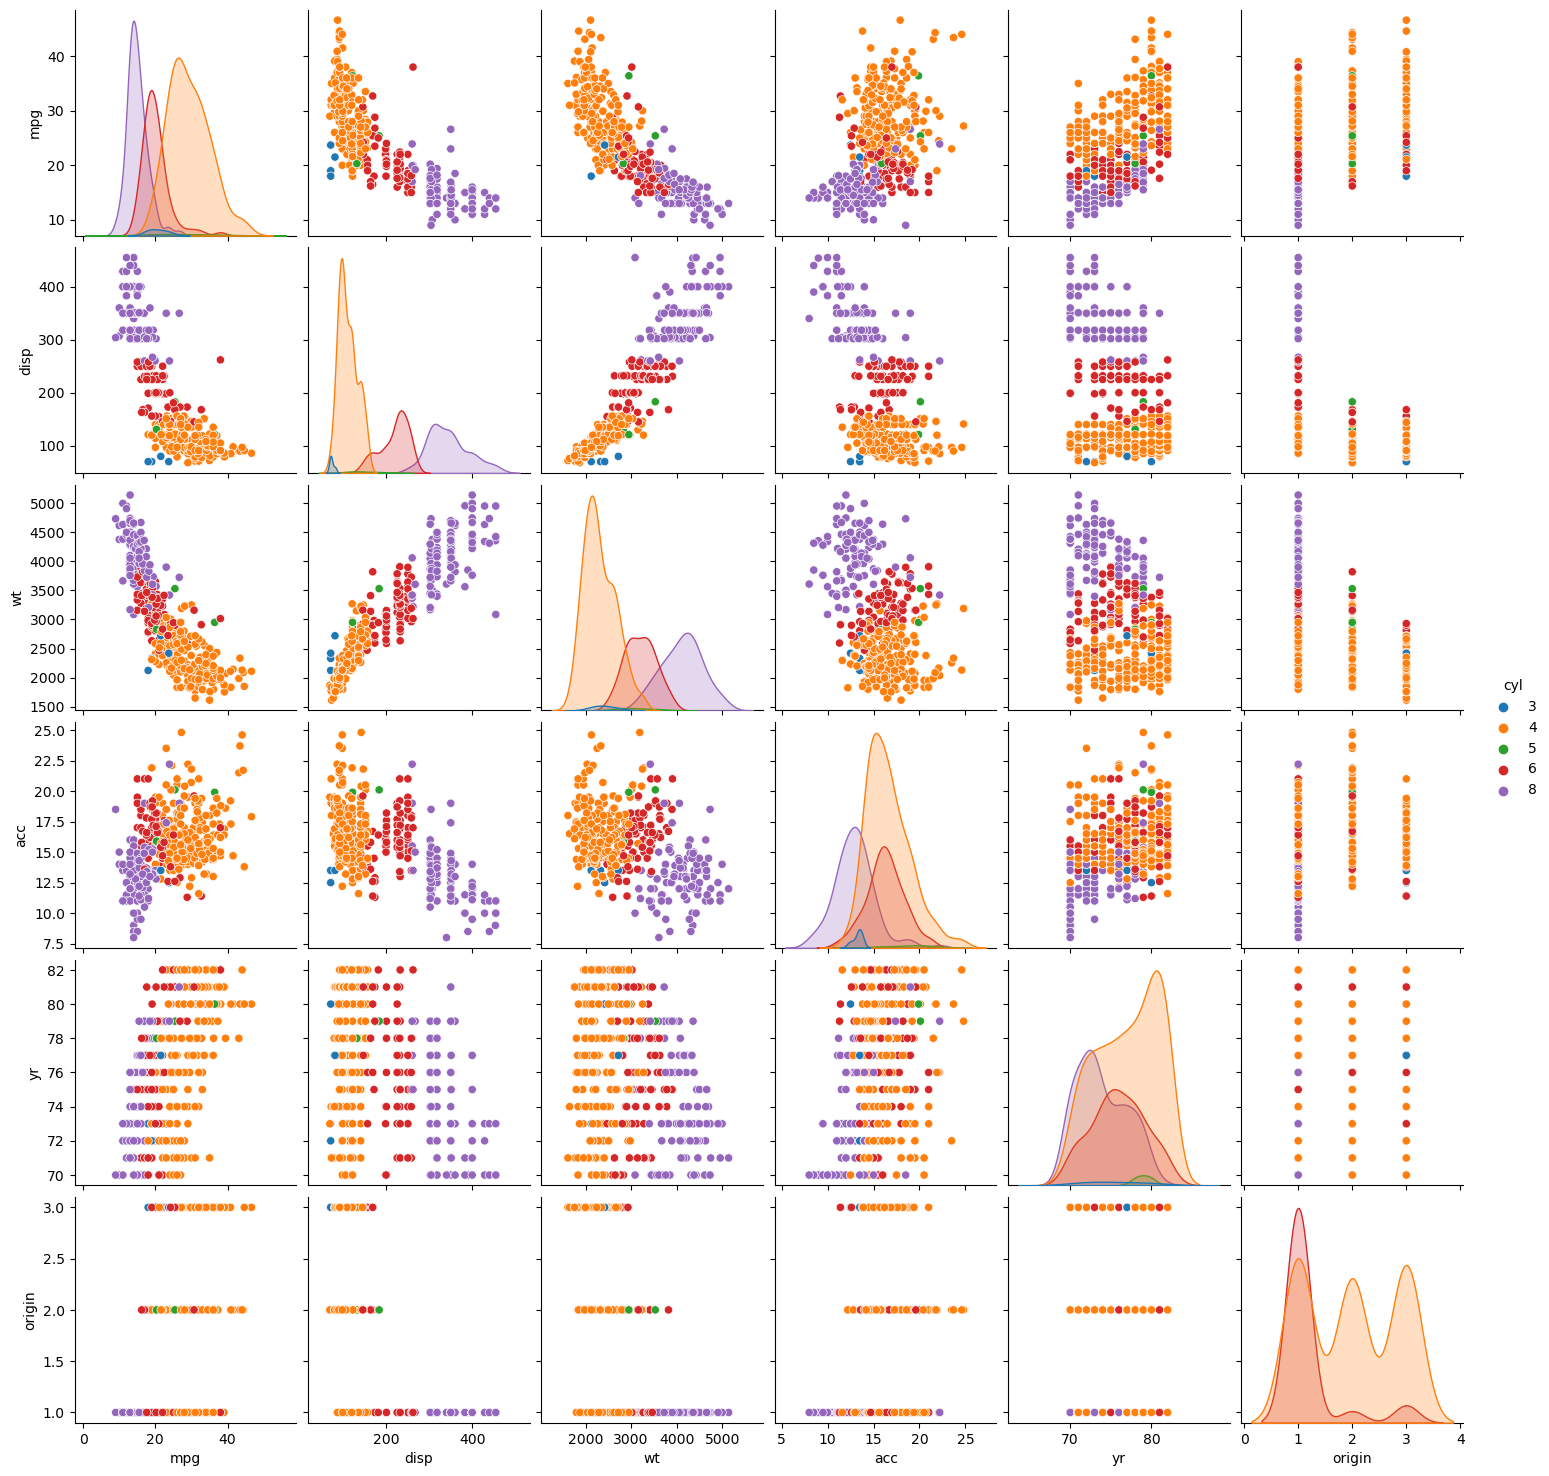

In [9]:
sns.pairplot(df,hue='cyl',palette='tab10')

<AxesSubplot:xlabel='wt', ylabel='disp'>

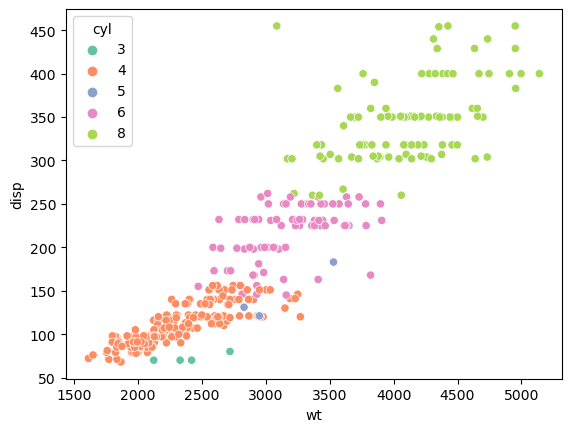

In [10]:
sns.scatterplot(data = df,x = 'wt', y= 'disp', hue = 'cyl',palette='Set2')

1. 'wt' is having positive linear relationship with cylinder displacement.
2. 'wt' and cylinder displacement is increasing along with increase in Number of Cylinders.
3. There are more vehicles with 4 cylinders and 8 cylinders than 3,5 & 6

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [12]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [13]:
df['hp'] = df['hp'].replace('?',np.nan)

In [14]:
df['hp'] = df['hp'].fillna(df.groupby('cyl')['hp'].transform('median'))

In [15]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [16]:
df['origin'] = df['origin'].map({1:"USA",2:"Europe",3:'Japan'})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
X = df.drop('car_name',axis = 1)

In [19]:
X = pd.get_dummies(X,drop_first = True)

In [20]:
X.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_Japan,origin_USA
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(X)

In [24]:
X = pd.DataFrame(X,columns = df.columns)

In [25]:
X.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.676181,0.630870,-1.295498,-1.627426,-0.497643,0.773559
1,-1.090751,1.498191,1.503514,1.590844,0.854333,-1.477038,-1.627426,-0.497643,0.773559
2,-0.706439,1.498191,1.196232,1.198845,0.550470,-1.658577,-1.627426,-0.497643,0.773559
3,-0.962647,1.498191,1.061796,1.198845,0.546923,-1.295498,-1.627426,-0.497643,0.773559
4,-0.834543,1.498191,1.042591,0.937513,0.565841,-1.840117,-1.627426,-0.497643,0.773559


In [26]:
from sklearn.cluster import KMeans

In [27]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters= k)
    
    model.fit(X)
    
    #Sum of squared distance to their closest center
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared distance')

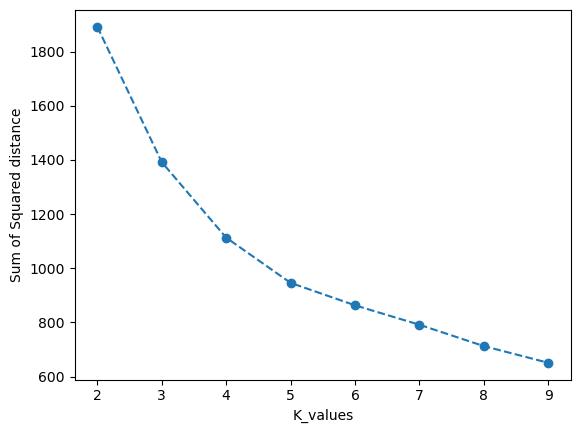

In [28]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K_values")
plt.ylabel("Sum of Squared distance")

In [29]:
ssd

[1891.6672070659902,
 1391.8790937343915,
 1112.919050966674,
 945.84629556118,
 863.0051175711938,
 791.2402094994426,
 712.3318534857808,
 650.7050959017591]

0           NaN
1   -499.788113
2   -278.960043
3   -167.072755
4    -82.841178
5    -71.764908
6    -78.908356
7    -61.626758
dtype: float64


<AxesSubplot:>

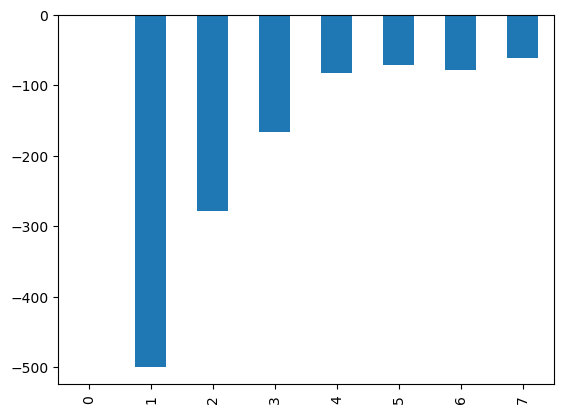

In [30]:
print(pd.Series(ssd).diff())
pd.Series(ssd).diff().plot(kind = 'bar')


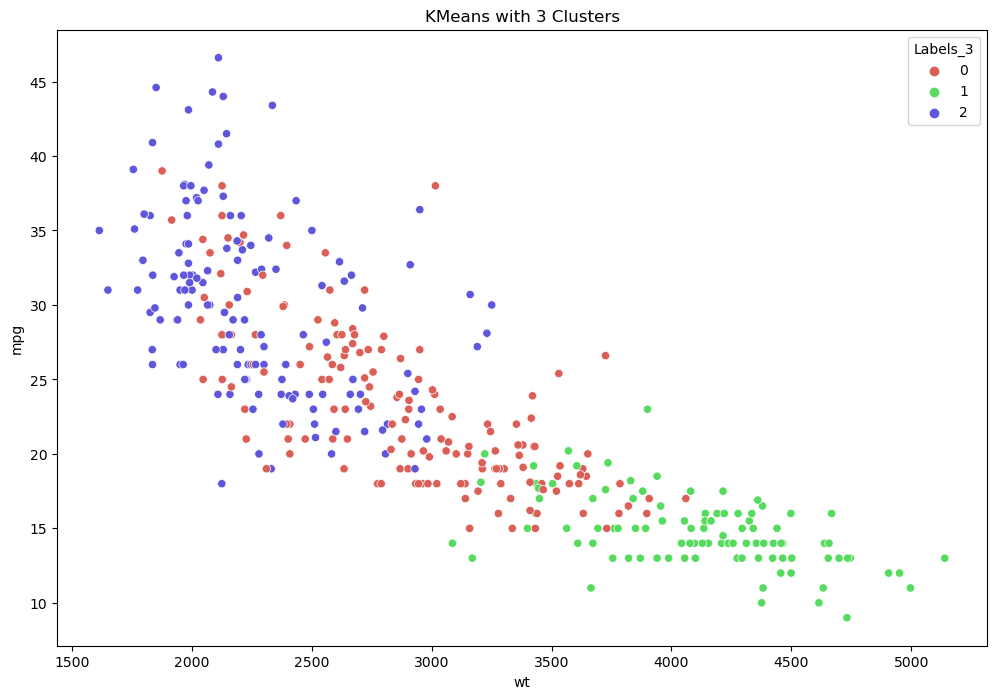

In [31]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

df['Labels_3'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = df['wt'], y = df['mpg'], hue=df['Labels_3'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [32]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels_3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,USA,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,USA,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,USA,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,USA,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,USA,1


<AxesSubplot:xlabel='hp', ylabel='mpg'>

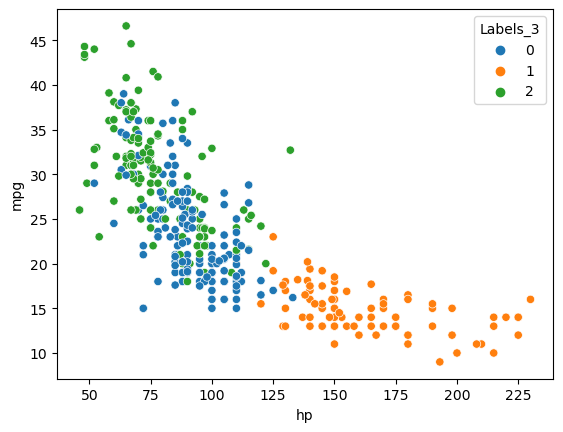

In [33]:
sns.scatterplot(data=df,x='hp',y='mpg',hue='Labels_3',palette='tab10')

<AxesSubplot:xlabel='wt', ylabel='hp'>

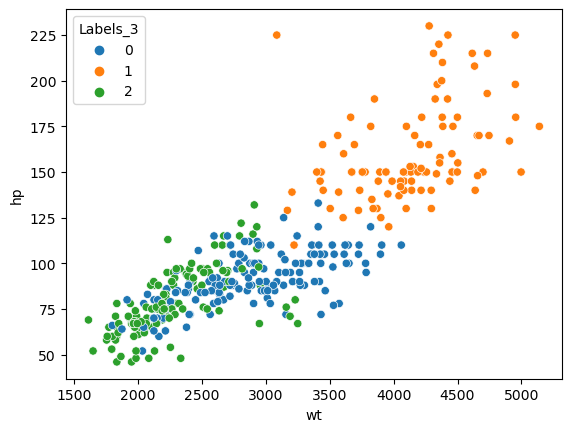

In [34]:
sns.scatterplot(data=df,y='hp',x='wt',hue='Labels_3',palette='tab10')

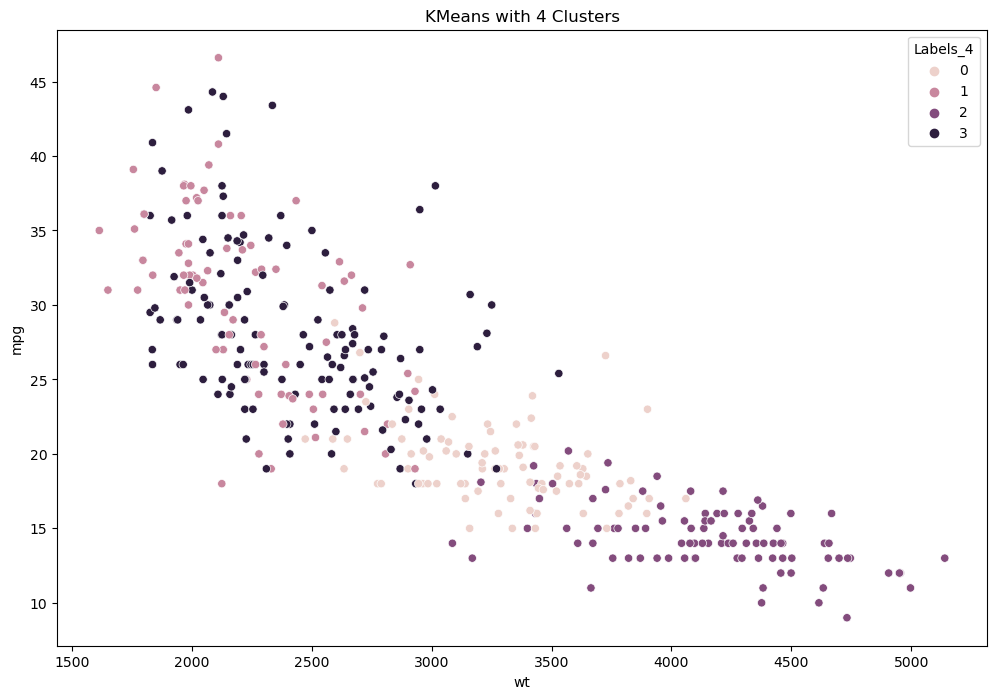

In [35]:
# 4 cluster
km5 = KMeans(n_clusters=4).fit(X)

df['Labels_4'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = df['wt'], y = df['mpg'], hue=df['Labels_4'])
plt.title('KMeans with 4 Clusters')
plt.show()

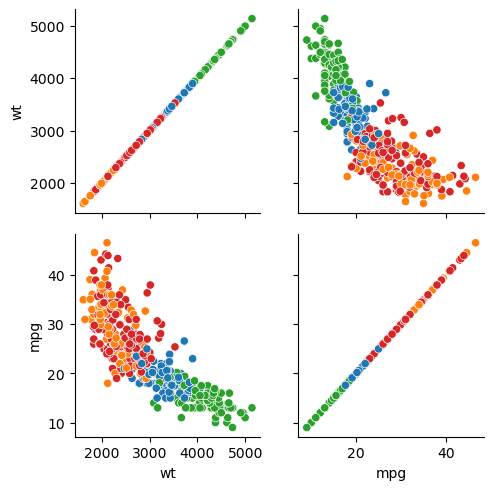

In [36]:
g = sns.PairGrid(df, vars=["wt", "mpg"], hue="Labels_4",palette='tab10',)
g.map(sns.scatterplot)

<AxesSubplot:xlabel='hp', ylabel='mpg'>

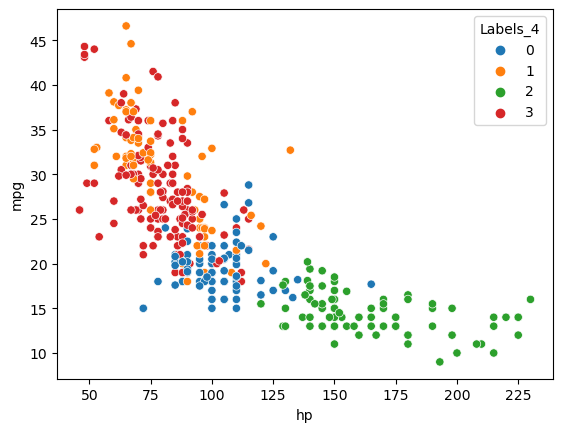

In [37]:
sns.scatterplot(data=df,x='hp',y='mpg',hue='Labels_4',palette='tab10')

<AxesSubplot:xlabel='wt', ylabel='hp'>

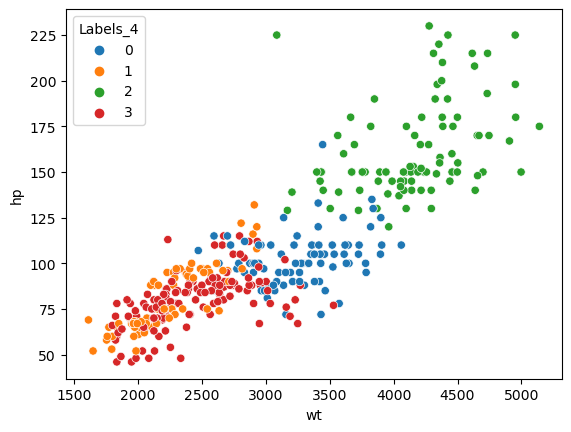

In [38]:
sns.scatterplot(data=df,y='hp',x='wt',hue='Labels_4',palette='tab10')